# ABOUT:
- this code performs backward elimnation using feature importance values from lightgbm
- approach:
    - acquire feature importances
    1. perform cv 
    2. remove the least important feature
    3. repeat 1-2 until no improvement in cv

### train model

In [1]:
from pandas import read_pickle
import lightgbm as lgb

In [2]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\data\full_train1.pkl"
data = read_pickle(path)

In [3]:
X_cols = [col for col in data.columns if col not in ["card_id","target"]]
X, y = data[X_cols], data['target']

In [11]:
for col in X.columns:
    print(col,end = ", ")

old_hist_count, old_authorized_flag_0_count, old_authorized_flag_1_count, old_authorized_flag_0_fraction, old_authorized_flag_1_fraction, old_category_1_0_count, old_category_1_1_count, old_category_1_0_fraction, old_category_1_1_fraction, old_category_2_1_0_count, old_category_2_2_0_count, old_category_2_3_0_count, old_category_2_4_0_count, old_category_2_5_0_count, old_category_2_1_0_fraction, old_category_2_2_0_fraction, old_category_2_3_0_fraction, old_category_2_4_0_fraction, old_category_2_5_0_fraction, old_category_3_A_count, old_category_3_B_count, old_category_3_C_count, old_category_3_A_fraction, old_category_3_B_fraction, old_category_3_C_fraction, old_city_id_bins_3_806_9_441_count, old_city_id_bins_9_441_9_928_count, old_city_id_bins_9_928_10_474_count, old_city_id_bins_10_474_11_183_count, old_city_id_bins_11_183_15_391_count, old_city_id_bins_3_806_9_441_fraction, old_city_id_bins_9_441_9_928_fraction, old_city_id_bins_9_928_10_474_fraction, old_city_id_bins_10_474_11_18

In [183]:
train = lgb.Dataset(data = X, label = y)

In [4]:
best_params = {
    'num_leaves': 163,
    'min_data_in_leaf': 325,
    'min_gain_to_split': 0.05621632216128067,
    'bagging_fraction': 0.8940498057598245,
    'lambda_l1': 0.00019163693019842484,
    'lambda_l2': 0.0027009967266884796,
    'feature_fraction': 0.5590704561219212,
    'boosting': 'gbdt',
    'extra_trees': False,
    "learning_rate":0.01,
    "objective": "regression",
    "max_depth":  -1,
    "bagging_freq": 10 ,                  # resamples rows at every k-th iteration
    "max_bin": 255,                        # bins continuous values
    "force_col_wise":  True  ,                 # reduce memory cost
    "weight_column": ""
}

In [185]:
cv = lgb.cv(
    params = best_params, 
    train_set = train, 
    num_boost_round = 1000, 
    nfold=3, 
    metrics = ["rmse"],
    stratified = False, 
    categorical_feature = "auto",
    verbose_eval = 10,
    early_stopping_rounds = 10,
    return_cvbooster = True
)

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 82704
[LightGBM] [Info] Number of data points in the train set: 134610, number of used features: 443
[LightGBM] [Info] Total Bins 82704
[LightGBM] [Info] Number of data points in the train set: 134610, number of used features: 443
[LightGBM] [Info] Total Bins 82704
[LightGBM] [Info] Number of data points in the train set: 134610, number of used features: 443
[LightGBM] [Info] Start training from score -0.384681


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.399389
[LightGBM] [Info] Start training from score -0.396838
[10]	cv_agg's rmse: 3.82382 + 0.0585708
[20]	cv_agg's rmse: 3.80132 + 0.0585615
[30]	cv_agg's rmse: 3.78228 + 0.058588
[40]	cv_agg's rmse: 3.76579 + 0.058744
[50]	cv_agg's rmse: 3.75181 + 0.0587151
[60]	cv_agg's rmse: 3.73986 + 0.0584849
[70]	cv_agg's rmse: 3.72977 + 0.0581794
[80]	cv_agg's rmse: 3.72122 + 0.0581783
[90]	cv_agg's rmse: 3.71382 + 0.057766
[100]	cv_agg's rmse: 3.70744 + 0.0575698
[110]	cv_agg's rmse: 3.70211 + 0.0572309
[120]	cv_agg's rmse: 3.69713 + 0.0571097
[130]	cv_agg's rmse: 3.693 + 0.0568
[140]	cv_agg's rmse: 3.68929 + 0.0567248
[150]	cv_agg's rmse: 3.68619 + 0.0564707
[160]	cv_agg's rmse: 3.68355 + 0.056506
[170]	cv_agg's rmse: 3.68105 + 0.0565231
[180]	cv_agg's rmse: 3.67895 + 0.0564028
[190]	cv_agg's rmse: 3.67708 + 0.0562731
[200]	cv_agg's rmse: 3.67542 + 0.0560911
[210]	cv_agg's rmse: 3.67399 + 0.0560956
[220]	cv_agg's rmse: 3.67262 + 0.0559661
[230]	cv

### get feature importances


In [15]:
from seaborn import barplot, lineplot
from numpy import array, percentile
from pandas import DataFrame

In [6]:
# path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\data\lightgbm_importances.pkl"
# feature_importances.to_pickle(path)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\data\lightgbm_importances.pkl"
feature_importances = read_pickle(path)

In [187]:
# feature_importances = array(cv["cvbooster"].feature_importance()).mean(axis = 0)
# feature_names = cv["cvbooster"].feature_name()[0]
# temp = DataFrame({"Feature Importance":feature_importances, "Feature Name":feature_names}).sort_values(by = "Feature Importance", ascending = False)
# temp["rank"] = range(len(temp)-1,-1, -1)
# temp['percentile'] = temp["rank"]/temp["rank"].max()

<AxesSubplot:xlabel='Feature Importance', ylabel='Feature Name'>

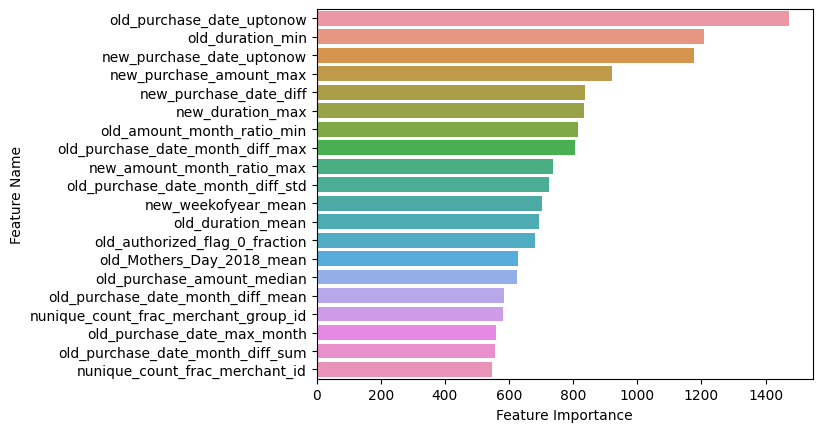

In [33]:
barplot(data = feature_importances.iloc[:20], x = "Feature Importance", y = "Feature Name")

<AxesSubplot:xlabel='Feature Importance', ylabel='Feature Name'>

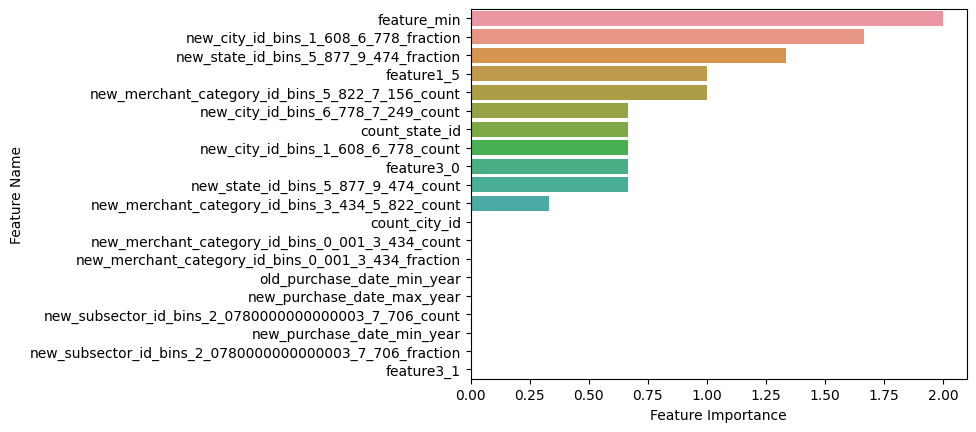

In [34]:
barplot(data = feature_importances.iloc[-20:], x = "Feature Importance", y = "Feature Name")

In [36]:
# feature importance percentile of embedding features
feature_importances[feature_importances["Feature Name"].apply(lambda name: "embedding" in name)]["percentile"].mean()

0.6135767790262173

In [6]:
# feature importance percentile of embedding similarity features
feature_importances[feature_importances["Feature Name"].apply(lambda name: "similarity" in name)]["percentile"].mean()

0.6185767790262173

### backward elimination

In [1]:
from pandas import read_pickle
import lightgbm as lgb

In [7]:
BE_results = []

In [11]:
for i in range(0,31):
    subset_features = feature_importances["Feature Name"][:-i].tolist()
    subset_features = feature_importances["Feature Name"].tolist() if i==0 else subset_features
    X, y = data[subset_features], data["target"]
    train = lgb.Dataset(data = X, label = y)
    cv = lgb.cv(
        params = best_params, 
        train_set = train, 
        num_boost_round = 500, 
        nfold=5, 
        metrics = ["rmse"],
        stratified = False, 
        categorical_feature = "auto",
        verbose_eval = 10,
        early_stopping_rounds = 10,
        return_cvbooster = False
    )
    score = min(cv["rmse-mean"])
    BE_results.append(score)
    print(BE_results)

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Start training from score -0.387307
[LightGBM] [Info] Start training from score -0.394715


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82255 + 0.070164
[20]	cv_agg's rmse: 3.79994 + 0.070288
[30]	cv_agg's rmse: 3.78075 + 0.0700187
[40]	cv_agg's rmse: 3.76428 + 0.0697281
[50]	cv_agg's rmse: 3.75024 + 0.0696638
[60]	cv_agg's rmse: 3.73863 + 0.0697181
[70]	cv_agg's rmse: 3.72841 + 0.069884
[80]	cv_agg's rmse: 3.72008 + 0.0698152
[90]	cv_agg's rmse: 3.71271 + 0.0697166
[100]	cv_agg's rmse: 3.70621 + 0.069602
[110]	cv_agg's rmse: 3.70039 + 0.0697897
[120]	cv_agg's rmse: 3.69569 + 0.0695674
[130]	cv_agg's rmse: 3.69143 + 0.0694324
[140]	cv_agg's rmse: 3.68795 + 0.0693524
[150]	cv_agg's rmse: 3.68489 + 0.0693902
[160]	cv_agg's rmse: 3.6823 + 0.0694168
[170]	cv_agg's rmse: 3.6799 + 0.0691723
[180]	cv_agg's rmse: 3.67771 + 0.0691296
[190]	cv_agg's rmse: 3.67581 + 0.0691372
[200]	cv_agg's rmse: 3.67428 + 0.06919
[210]	cv_agg's rmse: 3.67272 + 0.06

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81427
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 437
[LightGBM] [Info] Total Bins 81427
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 437
[LightGBM] [Info] Total Bins 81427
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 437
[LightGBM] [Info] Total Bins 81427
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 437
[LightGBM] [Info] Total Bins 81427
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 437
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82312 + 0.0702493
[20]	cv_agg's rmse: 3.8004 + 0.0704103
[30]	cv_agg's rmse: 3.78122 + 0.0704436
[40]	cv_agg's rmse: 3.7644 + 0.0701304
[50]	cv_agg's rmse: 3.75036 + 0.0700285
[60]	cv_agg's rmse: 3.73859 + 0.0701925
[70]	cv_agg's rmse: 3.72851 + 0.0702284
[80]	cv_agg's rmse: 3.71976 + 0.0702423
[90]	cv_agg's rmse: 3.71243 + 0.0701634
[100]	cv_agg's rmse: 3.70583 + 0.0700367
[110]	cv_agg's rmse: 3.70051 + 0.0699965
[120]	cv_agg's rmse: 3.69588 + 0.069947
[130]	cv_agg's rmse: 3.69163 + 0.0698787
[140]	cv_agg's rmse: 3.68782 + 0.0696953
[150]	cv_agg's rmse: 3.68475 + 0.0696374
[160]	cv_agg's rmse: 3.68224 + 0.0696153
[170]	cv_agg's rmse: 3.67991 + 0.0694017
[180]	cv_agg's rmse: 3.67778 + 0.0693732
[190]	cv_agg's rmse: 3.67602 + 0.0693106
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81345
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 436
[LightGBM] [Info] Total Bins 81345
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 436
[LightGBM] [Info] Total Bins 81345
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 436
[LightGBM] [Info] Total Bins 81345
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 436
[LightGBM] [Info] Total Bins 81345
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 436
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82332 + 0.0703262
[20]	cv_agg's rmse: 3.80041 + 0.0703517
[30]	cv_agg's rmse: 3.78108 + 0.0704362
[40]	cv_agg's rmse: 3.76441 + 0.0702691
[50]	cv_agg's rmse: 3.75037 + 0.0702387
[60]	cv_agg's rmse: 3.73868 + 0.0703791
[70]	cv_agg's rmse: 3.72865 + 0.0705272
[80]	cv_agg's rmse: 3.71978 + 0.0705591
[90]	cv_agg's rmse: 3.71253 + 0.0704942
[100]	cv_agg's rmse: 3.70604 + 0.0703713
[110]	cv_agg's rmse: 3.7002 + 0.0705599
[120]	cv_agg's rmse: 3.69537 + 0.0704685
[130]	cv_agg's rmse: 3.69135 + 0.0704379
[140]	cv_agg's rmse: 3.68765 + 0.0702345
[150]	cv_agg's rmse: 3.68452 + 0.0702061
[160]	cv_agg's rmse: 3.68196 + 0.0700895
[170]	cv_agg's rmse: 3.67949 + 0.0698399
[180]	cv_agg's rmse: 3.67729 + 0.0699677
[190]	cv_agg's rmse: 3.67535 + 0.0698466
[200]	cv_agg's 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81341
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 435
[LightGBM] [Info] Total Bins 81341
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 435
[LightGBM] [Info] Total Bins 81341
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 435
[LightGBM] [Info] Total Bins 81341
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 435
[LightGBM] [Info] Total Bins 81341
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 435
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82286 + 0.0702382
[20]	cv_agg's rmse: 3.80011 + 0.0704539
[30]	cv_agg's rmse: 3.78096 + 0.0705473
[40]	cv_agg's rmse: 3.7644 + 0.07021
[50]	cv_agg's rmse: 3.75047 + 0.0702952
[60]	cv_agg's rmse: 3.73881 + 0.0704542
[70]	cv_agg's rmse: 3.72882 + 0.0703292
[80]	cv_agg's rmse: 3.72033 + 0.0702626
[90]	cv_agg's rmse: 3.71288 + 0.0701645
[100]	cv_agg's rmse: 3.70641 + 0.0699337
[110]	cv_agg's rmse: 3.70102 + 0.0700849
[120]	cv_agg's rmse: 3.69627 + 0.0700236
[130]	cv_agg's rmse: 3.692 + 0.0698232
[140]	cv_agg's rmse: 3.68835 + 0.0698325
[150]	cv_agg's rmse: 3.68522 + 0.0697408
[160]	cv_agg's rmse: 3.68251 + 0.0697895
[170]	cv_agg's rmse: 3.68005 + 0.0695748
[180]	cv_agg's rmse: 3.67775 + 0.0695936
[190]	cv_agg's rmse: 3.67581 + 0.0695758
[200]	cv_agg's rmse

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81335
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 434
[LightGBM] [Info] Total Bins 81335
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 434
[LightGBM] [Info] Total Bins 81335
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 434
[LightGBM] [Info] Total Bins 81335
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 434
[LightGBM] [Info] Total Bins 81335
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 434
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82285 + 0.0702478
[20]	cv_agg's rmse: 3.80011 + 0.0703418
[30]	cv_agg's rmse: 3.7811 + 0.070345
[40]	cv_agg's rmse: 3.76449 + 0.0700841
[50]	cv_agg's rmse: 3.75047 + 0.0701447
[60]	cv_agg's rmse: 3.7389 + 0.0702482
[70]	cv_agg's rmse: 3.72877 + 0.0703426
[80]	cv_agg's rmse: 3.72015 + 0.0703332
[90]	cv_agg's rmse: 3.71262 + 0.0703118
[100]	cv_agg's rmse: 3.70604 + 0.0702161
[110]	cv_agg's rmse: 3.70034 + 0.0702834
[120]	cv_agg's rmse: 3.69573 + 0.0701702
[130]	cv_agg's rmse: 3.69171 + 0.0701688
[140]	cv_agg's rmse: 3.68807 + 0.0700446
[150]	cv_agg's rmse: 3.68509 + 0.0700487
[160]	cv_agg's rmse: 3.68248 + 0.0700136
[170]	cv_agg's rmse: 3.67996 + 0.0698985
[180]	cv_agg's rmse: 3.67768 + 0.0698841
[190]	cv_agg's rmse: 3.67582 + 0.0697895
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82331 + 0.070385
[20]	cv_agg's rmse: 3.80066 + 0.0706167
[30]	cv_agg's rmse: 3.78108 + 0.0705682
[40]	cv_agg's rmse: 3.76454 + 0.0703269
[50]	cv_agg's rmse: 3.75062 + 0.0705028
[60]	cv_agg's rmse: 3.73859 + 0.0704778
[70]	cv_agg's rmse: 3.72844 + 0.0704963
[80]	cv_agg's rmse: 3.7199 + 0.070458
[90]	cv_agg's rmse: 3.71245 + 0.0704489
[100]	cv_agg's rmse: 3.70583 + 0.0703838
[110]	cv_agg's rmse: 3.70017 + 0.0704956
[120]	cv_agg's rmse: 3.69555 + 0.0703819
[130]	cv_agg's rmse: 3.69153 + 0.0701596
[140]	cv_agg's rmse: 3.68787 + 0.0699996
[150]	cv_agg's rmse: 3.68472 + 0.0697652
[160]	cv_agg's rmse: 3.68196 + 0.069717
[170]	cv_agg's rmse: 3.67967 + 0.0696227
[180]	cv_agg's rmse: 3.67738 + 0.0695577
[190]	cv_agg's rmse: 3.67543 + 0.0695147
[200]	cv_agg's rms

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82331 + 0.070385
[20]	cv_agg's rmse: 3.80066 + 0.0706167
[30]	cv_agg's rmse: 3.78108 + 0.0705682
[40]	cv_agg's rmse: 3.76454 + 0.0703269
[50]	cv_agg's rmse: 3.75062 + 0.0705028
[60]	cv_agg's rmse: 3.73859 + 0.0704778
[70]	cv_agg's rmse: 3.72844 + 0.0704963
[80]	cv_agg's rmse: 3.7199 + 0.070458
[90]	cv_agg's rmse: 3.71245 + 0.0704489
[100]	cv_agg's rmse: 3.70583 + 0.0703838
[110]	cv_agg's rmse: 3.70017 + 0.0704956
[120]	cv_agg's rmse: 3.69555 + 0.0703819
[130]	cv_agg's rmse: 3.69153 + 0.0701596
[140]	cv_agg's rmse: 3.68787 + 0.0699996
[150]	cv_agg's rmse: 3.68472 + 0.0697652
[160]	cv_agg's rmse: 3.68196 + 0.069717
[170]	cv_agg's rmse: 3.67967 + 0.0696227
[180]	cv_agg's rmse: 3.67738 + 0.0695577
[190]	cv_agg's rmse: 3.67543 + 0.0695147
[200]	cv_agg's rms

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Start training from score -0.387307
[LightGBM] [Info] Start training from score -0.394715


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82331 + 0.070385
[20]	cv_agg's rmse: 3.80066 + 0.0706167
[30]	cv_agg's rmse: 3.78108 + 0.0705682
[40]	cv_agg's rmse: 3.76454 + 0.0703269
[50]	cv_agg's rmse: 3.75062 + 0.0705028
[60]	cv_agg's rmse: 3.73859 + 0.0704778
[70]	cv_agg's rmse: 3.72844 + 0.0704963
[80]	cv_agg's rmse: 3.7199 + 0.070458
[90]	cv_agg's rmse: 3.71245 + 0.0704489
[100]	cv_agg's rmse: 3.70583 + 0.0703838
[110]	cv_agg's rmse: 3.70017 + 0.0704956
[120]	cv_agg's rmse: 3.69555 + 0.0703819
[130]	cv_agg's rmse: 3.69153 + 0.0701596
[140]	cv_agg's rmse: 3.68787 + 0.0699996
[150]	cv_agg's rmse: 3.68472 + 0.0697652
[160]	cv_agg's rmse: 3.68196 + 0.069717
[170]	cv_agg's rmse: 3.67967 + 0.0696227
[180]	cv_agg's rmse: 3.67738 + 0.0695577
[190]	cv_agg's rmse: 3.67543 + 0.0695147
[200]	cv_agg's rmse: 3.67389 + 0.0693825
[210]	cv_agg's rmse: 3.67244 + 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Total Bins 81331
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 433
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82331 + 0.070385
[20]	cv_agg's rmse: 3.80066 + 0.0706167
[30]	cv_agg's rmse: 3.78108 + 0.0705682
[40]	cv_agg's rmse: 3.76454 + 0.0703269
[50]	cv_agg's rmse: 3.75062 + 0.0705028
[60]	cv_agg's rmse: 3.73859 + 0.0704778
[70]	cv_agg's rmse: 3.72844 + 0.0704963
[80]	cv_agg's rmse: 3.7199 + 0.070458
[90]	cv_agg's rmse: 3.71245 + 0.0704489
[100]	cv_agg's rmse: 3.70583 + 0.0703838
[110]	cv_agg's rmse: 3.70017 + 0.0704956
[120]	cv_agg's rmse: 3.69555 + 0.0703819
[130]	cv_agg's rmse: 3.69153 + 0.0701596
[140]	cv_agg's rmse: 3.68787 + 0.0699996
[150]	cv_agg's rmse: 3.68472 + 0.0697652
[160]	cv_agg's rmse: 3.68196 + 0.069717
[170]	cv_agg's rmse: 3.67967 + 0.0696227
[180]	cv_agg's rmse: 3.67738 + 0.0695577
[190]	cv_agg's rmse: 3.67543 + 0.0695147
[200]	cv_agg's rms

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81076
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 432
[LightGBM] [Info] Total Bins 81076
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 432
[LightGBM] [Info] Total Bins 81076
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 432
[LightGBM] [Info] Total Bins 81076
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 432
[LightGBM] [Info] Total Bins 81076
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 432
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.823 + 0.0701037
[20]	cv_agg's rmse: 3.8003 + 0.0703135
[30]	cv_agg's rmse: 3.78098 + 0.0703278
[40]	cv_agg's rmse: 3.76452 + 0.070135
[50]	cv_agg's rmse: 3.75041 + 0.070259
[60]	cv_agg's rmse: 3.73854 + 0.0703925
[70]	cv_agg's rmse: 3.72833 + 0.070475
[80]	cv_agg's rmse: 3.7195 + 0.0704912
[90]	cv_agg's rmse: 3.71212 + 0.0703439
[100]	cv_agg's rmse: 3.70546 + 0.0701962
[110]	cv_agg's rmse: 3.69964 + 0.0702905
[120]	cv_agg's rmse: 3.69488 + 0.0703649
[130]	cv_agg's rmse: 3.69073 + 0.0702993
[140]	cv_agg's rmse: 3.687 + 0.070083
[150]	cv_agg's rmse: 3.68409 + 0.0701007
[160]	cv_agg's rmse: 3.68131 + 0.0701297
[170]	cv_agg's rmse: 3.67892 + 0.0700089
[180]	cv_agg's rmse: 3.67679 + 0.0699469
[190]	cv_agg's rmse: 3.6749 + 0.0698557
[200]	cv_agg's rmse: 3.67

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81070
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 431
[LightGBM] [Info] Total Bins 81070
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 431
[LightGBM] [Info] Total Bins 81070
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 431
[LightGBM] [Info] Total Bins 81070
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 431
[LightGBM] [Info] Total Bins 81070
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 431
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82306 + 0.0702961
[20]	cv_agg's rmse: 3.80031 + 0.0704232
[30]	cv_agg's rmse: 3.78113 + 0.0704474
[40]	cv_agg's rmse: 3.76458 + 0.0701967
[50]	cv_agg's rmse: 3.75048 + 0.0702478
[60]	cv_agg's rmse: 3.73878 + 0.0703035
[70]	cv_agg's rmse: 3.72861 + 0.0704143
[80]	cv_agg's rmse: 3.72019 + 0.0702996
[90]	cv_agg's rmse: 3.71281 + 0.0702339
[100]	cv_agg's rmse: 3.70619 + 0.0701399
[110]	cv_agg's rmse: 3.70053 + 0.0701224
[120]	cv_agg's rmse: 3.69577 + 0.0699694
[130]	cv_agg's rmse: 3.69168 + 0.0698367
[140]	cv_agg's rmse: 3.68806 + 0.069747
[150]	cv_agg's rmse: 3.68493 + 0.0698041
[160]	cv_agg's rmse: 3.68218 + 0.0696613
[170]	cv_agg's rmse: 3.67997 + 0.0696486
[180]	cv_agg's rmse: 3.67768 + 0.0696496
[190]	cv_agg's rmse: 3.67594 + 0.0696514
[200]	cv_agg's 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81039
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 430
[LightGBM] [Info] Total Bins 81039
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 430
[LightGBM] [Info] Total Bins 81039
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 430
[LightGBM] [Info] Total Bins 81039
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 430
[LightGBM] [Info] Total Bins 81039
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 430
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82333 + 0.070247
[20]	cv_agg's rmse: 3.80042 + 0.0704614
[30]	cv_agg's rmse: 3.78158 + 0.0704075
[40]	cv_agg's rmse: 3.76503 + 0.0703633
[50]	cv_agg's rmse: 3.75137 + 0.0703474
[60]	cv_agg's rmse: 3.73923 + 0.0705757
[70]	cv_agg's rmse: 3.72911 + 0.0707499
[80]	cv_agg's rmse: 3.72046 + 0.0707774
[90]	cv_agg's rmse: 3.71294 + 0.0705437
[100]	cv_agg's rmse: 3.70645 + 0.0703586
[110]	cv_agg's rmse: 3.70071 + 0.0704193
[120]	cv_agg's rmse: 3.69592 + 0.0703211
[130]	cv_agg's rmse: 3.69193 + 0.0700514
[140]	cv_agg's rmse: 3.68835 + 0.0699635
[150]	cv_agg's rmse: 3.68516 + 0.0698797
[160]	cv_agg's rmse: 3.68253 + 0.069747
[170]	cv_agg's rmse: 3.68013 + 0.0697573
[180]	cv_agg's rmse: 3.67781 + 0.0697448
[190]	cv_agg's rmse: 3.67601 + 0.069839
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81037
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 429
[LightGBM] [Info] Total Bins 81037
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 429
[LightGBM] [Info] Total Bins 81037
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 429
[LightGBM] [Info] Total Bins 81037
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 429
[LightGBM] [Info] Total Bins 81037
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 429
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82261 + 0.0700541
[20]	cv_agg's rmse: 3.80014 + 0.0701697
[30]	cv_agg's rmse: 3.78125 + 0.0702362
[40]	cv_agg's rmse: 3.76487 + 0.0701462
[50]	cv_agg's rmse: 3.75052 + 0.0700685
[60]	cv_agg's rmse: 3.73865 + 0.0703071
[70]	cv_agg's rmse: 3.72839 + 0.0703347
[80]	cv_agg's rmse: 3.71975 + 0.0703676
[90]	cv_agg's rmse: 3.71225 + 0.0702182
[100]	cv_agg's rmse: 3.70542 + 0.0699652
[110]	cv_agg's rmse: 3.69994 + 0.0699457
[120]	cv_agg's rmse: 3.69522 + 0.0698348
[130]	cv_agg's rmse: 3.69118 + 0.0696637
[140]	cv_agg's rmse: 3.6876 + 0.0697349
[150]	cv_agg's rmse: 3.68465 + 0.0696635
[160]	cv_agg's rmse: 3.68189 + 0.0694911
[170]	cv_agg's rmse: 3.67953 + 0.0693603
[180]	cv_agg's rmse: 3.67724 + 0.0693725
[190]	cv_agg's rmse: 3.67541 + 0.0693074
[200]	cv_agg's 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81015
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 428
[LightGBM] [Info] Total Bins 81015
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 428
[LightGBM] [Info] Total Bins 81015
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 428
[LightGBM] [Info] Total Bins 81015
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 428
[LightGBM] [Info] Total Bins 81015
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 428
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82257 + 0.0699167
[20]	cv_agg's rmse: 3.7999 + 0.0700897
[30]	cv_agg's rmse: 3.78074 + 0.0702593
[40]	cv_agg's rmse: 3.76423 + 0.0701336
[50]	cv_agg's rmse: 3.75033 + 0.0703096
[60]	cv_agg's rmse: 3.73846 + 0.0705247
[70]	cv_agg's rmse: 3.72857 + 0.0705911
[80]	cv_agg's rmse: 3.72016 + 0.0703564
[90]	cv_agg's rmse: 3.71269 + 0.0702547
[100]	cv_agg's rmse: 3.70605 + 0.0701623
[110]	cv_agg's rmse: 3.70044 + 0.0701548
[120]	cv_agg's rmse: 3.6957 + 0.070048
[130]	cv_agg's rmse: 3.69148 + 0.0699508
[140]	cv_agg's rmse: 3.68764 + 0.0699931
[150]	cv_agg's rmse: 3.68451 + 0.0699107
[160]	cv_agg's rmse: 3.68182 + 0.0699698
[170]	cv_agg's rmse: 3.67953 + 0.0700425
[180]	cv_agg's rmse: 3.67739 + 0.0699649
[190]	cv_agg's rmse: 3.67543 + 0.0699149
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80760
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 427
[LightGBM] [Info] Total Bins 80760
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 427
[LightGBM] [Info] Total Bins 80760
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 427
[LightGBM] [Info] Total Bins 80760
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 427
[LightGBM] [Info] Total Bins 80760
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 427
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.823 + 0.0702543
[20]	cv_agg's rmse: 3.8007 + 0.0702424
[30]	cv_agg's rmse: 3.78138 + 0.0705386
[40]	cv_agg's rmse: 3.76481 + 0.0703516
[50]	cv_agg's rmse: 3.75083 + 0.0704454
[60]	cv_agg's rmse: 3.73905 + 0.070467
[70]	cv_agg's rmse: 3.72909 + 0.0704073
[80]	cv_agg's rmse: 3.72037 + 0.0704638
[90]	cv_agg's rmse: 3.71304 + 0.0702487
[100]	cv_agg's rmse: 3.70646 + 0.0701054
[110]	cv_agg's rmse: 3.70075 + 0.0701276
[120]	cv_agg's rmse: 3.69597 + 0.0701375
[130]	cv_agg's rmse: 3.69161 + 0.0699624
[140]	cv_agg's rmse: 3.68785 + 0.0697426
[150]	cv_agg's rmse: 3.68474 + 0.0697501
[160]	cv_agg's rmse: 3.68214 + 0.0696755
[170]	cv_agg's rmse: 3.67972 + 0.0695116
[180]	cv_agg's rmse: 3.67738 + 0.069471
[190]	cv_agg's rmse: 3.67554 + 0.0694289
[200]	cv_agg's rmse

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80734
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 426
[LightGBM] [Info] Total Bins 80734
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 426
[LightGBM] [Info] Total Bins 80734
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 426
[LightGBM] [Info] Total Bins 80734
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 426
[LightGBM] [Info] Total Bins 80734
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 426
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82335 + 0.0702795
[20]	cv_agg's rmse: 3.80007 + 0.0704133
[30]	cv_agg's rmse: 3.78104 + 0.0703836
[40]	cv_agg's rmse: 3.76455 + 0.0701991
[50]	cv_agg's rmse: 3.75013 + 0.0701379
[60]	cv_agg's rmse: 3.73853 + 0.0703405
[70]	cv_agg's rmse: 3.72842 + 0.0703519
[80]	cv_agg's rmse: 3.71973 + 0.0703064
[90]	cv_agg's rmse: 3.71218 + 0.0700073
[100]	cv_agg's rmse: 3.70569 + 0.0698467
[110]	cv_agg's rmse: 3.7001 + 0.0699904
[120]	cv_agg's rmse: 3.69533 + 0.0698072
[130]	cv_agg's rmse: 3.69119 + 0.0696733
[140]	cv_agg's rmse: 3.68743 + 0.0695386
[150]	cv_agg's rmse: 3.68436 + 0.0694292
[160]	cv_agg's rmse: 3.68165 + 0.0694688
[170]	cv_agg's rmse: 3.67913 + 0.0696016
[180]	cv_agg's rmse: 3.67693 + 0.0695468
[190]	cv_agg's rmse: 3.67512 + 0.0694902
[200]	cv_agg's 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80727
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 425
[LightGBM] [Info] Total Bins 80727
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 425
[LightGBM] [Info] Total Bins 80727
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 425
[LightGBM] [Info] Total Bins 80727
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 425
[LightGBM] [Info] Total Bins 80727
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 425
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82303 + 0.0701528
[20]	cv_agg's rmse: 3.80044 + 0.0704018
[30]	cv_agg's rmse: 3.78113 + 0.0704716
[40]	cv_agg's rmse: 3.76464 + 0.0703703
[50]	cv_agg's rmse: 3.75059 + 0.0703193
[60]	cv_agg's rmse: 3.73885 + 0.0704248
[70]	cv_agg's rmse: 3.72868 + 0.0704493
[80]	cv_agg's rmse: 3.71998 + 0.0703848
[90]	cv_agg's rmse: 3.71251 + 0.070181
[100]	cv_agg's rmse: 3.70583 + 0.0700829
[110]	cv_agg's rmse: 3.70044 + 0.0700575
[120]	cv_agg's rmse: 3.69574 + 0.0699134
[130]	cv_agg's rmse: 3.69149 + 0.0697342
[140]	cv_agg's rmse: 3.68784 + 0.069562
[150]	cv_agg's rmse: 3.68469 + 0.0695247
[160]	cv_agg's rmse: 3.68197 + 0.0694324
[170]	cv_agg's rmse: 3.67969 + 0.0692346
[180]	cv_agg's rmse: 3.67751 + 0.0692559
[190]	cv_agg's rmse: 3.67564 + 0.0692327
[200]	cv_agg's r

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82287 + 0.0701899
[20]	cv_agg's rmse: 3.80023 + 0.0701083
[30]	cv_agg's rmse: 3.78131 + 0.0700074
[40]	cv_agg's rmse: 3.76482 + 0.0698038
[50]	cv_agg's rmse: 3.75074 + 0.0698113
[60]	cv_agg's rmse: 3.73872 + 0.0699165
[70]	cv_agg's rmse: 3.72828 + 0.0700279
[80]	cv_agg's rmse: 3.71946 + 0.0698767
[90]	cv_agg's rmse: 3.71192 + 0.0697551
[100]	cv_agg's rmse: 3.7053 + 0.0697935
[110]	cv_agg's rmse: 3.69968 + 0.0698038
[120]	cv_agg's rmse: 3.695 + 0.0698364
[130]	cv_agg's rmse: 3.69095 + 0.0696911
[140]	cv_agg's rmse: 3.68726 + 0.0695403
[150]	cv_agg's rmse: 3.68423 + 0.0695283
[160]	cv_agg's rmse: 3.68149 + 0.0694978
[170]	cv_agg's rmse: 3.67925 + 0.0692609
[180]	cv_agg's rmse: 3.67701 + 0.0692207
[190]	cv_agg's rmse: 3.67504 + 0.0691659
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80546
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 423
[LightGBM] [Info] Total Bins 80546
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 423
[LightGBM] [Info] Total Bins 80546
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 423
[LightGBM] [Info] Total Bins 80546
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 423
[LightGBM] [Info] Total Bins 80546
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 423
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82308 + 0.070224
[20]	cv_agg's rmse: 3.80015 + 0.0703942
[30]	cv_agg's rmse: 3.78103 + 0.070577
[40]	cv_agg's rmse: 3.76411 + 0.0704426
[50]	cv_agg's rmse: 3.75003 + 0.0703753
[60]	cv_agg's rmse: 3.73804 + 0.070526
[70]	cv_agg's rmse: 3.72777 + 0.0706271
[80]	cv_agg's rmse: 3.71923 + 0.0706213
[90]	cv_agg's rmse: 3.7119 + 0.0704403
[100]	cv_agg's rmse: 3.70564 + 0.0703056
[110]	cv_agg's rmse: 3.70002 + 0.0702514
[120]	cv_agg's rmse: 3.69522 + 0.0701256
[130]	cv_agg's rmse: 3.69129 + 0.0699507
[140]	cv_agg's rmse: 3.68769 + 0.0699276
[150]	cv_agg's rmse: 3.68472 + 0.0699059
[160]	cv_agg's rmse: 3.68194 + 0.0698178
[170]	cv_agg's rmse: 3.67968 + 0.0696027
[180]	cv_agg's rmse: 3.67748 + 0.0695703
[190]	cv_agg's rmse: 3.67558 + 0.0694811
[200]	cv_agg's rms

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80370
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 422
[LightGBM] [Info] Total Bins 80370
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 422
[LightGBM] [Info] Total Bins 80370
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 422
[LightGBM] [Info] Total Bins 80370
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 422
[LightGBM] [Info] Total Bins 80370
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 422
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.8234 + 0.0701201
[20]	cv_agg's rmse: 3.80109 + 0.0701116
[30]	cv_agg's rmse: 3.78192 + 0.0701235
[40]	cv_agg's rmse: 3.76497 + 0.0699624
[50]	cv_agg's rmse: 3.75085 + 0.0699796
[60]	cv_agg's rmse: 3.7389 + 0.0699262
[70]	cv_agg's rmse: 3.72886 + 0.0698992
[80]	cv_agg's rmse: 3.72006 + 0.0699593
[90]	cv_agg's rmse: 3.71255 + 0.0699079
[100]	cv_agg's rmse: 3.70604 + 0.0697871
[110]	cv_agg's rmse: 3.70048 + 0.0699083
[120]	cv_agg's rmse: 3.6958 + 0.0698541
[130]	cv_agg's rmse: 3.69161 + 0.0697718
[140]	cv_agg's rmse: 3.68795 + 0.069733
[150]	cv_agg's rmse: 3.68475 + 0.0696706
[160]	cv_agg's rmse: 3.68198 + 0.0696458
[170]	cv_agg's rmse: 3.67971 + 0.0695398
[180]	cv_agg's rmse: 3.67739 + 0.0695241
[190]	cv_agg's rmse: 3.67572 + 0.0693844
[200]	cv_agg's rms

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80368
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 421
[LightGBM] [Info] Total Bins 80368
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 421
[LightGBM] [Info] Total Bins 80368
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 421
[LightGBM] [Info] Total Bins 80368
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 421
[LightGBM] [Info] Total Bins 80368
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 421
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82307 + 0.0701264
[20]	cv_agg's rmse: 3.80023 + 0.0701507
[30]	cv_agg's rmse: 3.78082 + 0.0703197
[40]	cv_agg's rmse: 3.76437 + 0.0700848
[50]	cv_agg's rmse: 3.75026 + 0.0700955
[60]	cv_agg's rmse: 3.73855 + 0.0702809
[70]	cv_agg's rmse: 3.72873 + 0.0703139
[80]	cv_agg's rmse: 3.72021 + 0.0702021
[90]	cv_agg's rmse: 3.71264 + 0.0700682
[100]	cv_agg's rmse: 3.70596 + 0.0698568
[110]	cv_agg's rmse: 3.70031 + 0.069952
[120]	cv_agg's rmse: 3.69558 + 0.0698689
[130]	cv_agg's rmse: 3.69146 + 0.0696794
[140]	cv_agg's rmse: 3.68768 + 0.0695855
[150]	cv_agg's rmse: 3.68459 + 0.0695261
[160]	cv_agg's rmse: 3.68194 + 0.0694547
[170]	cv_agg's rmse: 3.67962 + 0.0694446
[180]	cv_agg's rmse: 3.67755 + 0.0695113
[190]	cv_agg's rmse: 3.67576 + 0.0694924
[200]	cv_agg's 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80359
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 420
[LightGBM] [Info] Total Bins 80359
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 420
[LightGBM] [Info] Total Bins 80359
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 420
[LightGBM] [Info] Total Bins 80359
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 420
[LightGBM] [Info] Total Bins 80359
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 420
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.8229 + 0.0702687
[20]	cv_agg's rmse: 3.80002 + 0.0704275
[30]	cv_agg's rmse: 3.78116 + 0.0702589
[40]	cv_agg's rmse: 3.76462 + 0.0699245
[50]	cv_agg's rmse: 3.75071 + 0.0700161
[60]	cv_agg's rmse: 3.73905 + 0.0701066
[70]	cv_agg's rmse: 3.72871 + 0.070317
[80]	cv_agg's rmse: 3.72008 + 0.0702644
[90]	cv_agg's rmse: 3.71278 + 0.0698923
[100]	cv_agg's rmse: 3.70629 + 0.0698878
[110]	cv_agg's rmse: 3.70068 + 0.0698516
[120]	cv_agg's rmse: 3.69584 + 0.0696839
[130]	cv_agg's rmse: 3.69154 + 0.0694278
[140]	cv_agg's rmse: 3.68792 + 0.0694029
[150]	cv_agg's rmse: 3.68481 + 0.0692503
[160]	cv_agg's rmse: 3.6821 + 0.069212
[170]	cv_agg's rmse: 3.67978 + 0.0690891
[180]	cv_agg's rmse: 3.67739 + 0.0691353
[190]	cv_agg's rmse: 3.67547 + 0.0690527
[200]	cv_agg's rms

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80352
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 419
[LightGBM] [Info] Total Bins 80352
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 419
[LightGBM] [Info] Total Bins 80352
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 419
[LightGBM] [Info] Total Bins 80352
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 419
[LightGBM] [Info] Total Bins 80352
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 419
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82348 + 0.0702995
[20]	cv_agg's rmse: 3.80064 + 0.0705354
[30]	cv_agg's rmse: 3.78133 + 0.070657
[40]	cv_agg's rmse: 3.76488 + 0.0704267
[50]	cv_agg's rmse: 3.75085 + 0.0704864
[60]	cv_agg's rmse: 3.73904 + 0.0703344
[70]	cv_agg's rmse: 3.72858 + 0.070431
[80]	cv_agg's rmse: 3.71991 + 0.070287
[90]	cv_agg's rmse: 3.7125 + 0.0700544
[100]	cv_agg's rmse: 3.70607 + 0.0698717
[110]	cv_agg's rmse: 3.70057 + 0.0699165
[120]	cv_agg's rmse: 3.69586 + 0.069788
[130]	cv_agg's rmse: 3.6918 + 0.0696976
[140]	cv_agg's rmse: 3.68817 + 0.069569
[150]	cv_agg's rmse: 3.68505 + 0.069486
[160]	cv_agg's rmse: 3.68237 + 0.0694808
[170]	cv_agg's rmse: 3.67993 + 0.0693091
[180]	cv_agg's rmse: 3.67765 + 0.0694331
[190]	cv_agg's rmse: 3.67573 + 0.0693245
[200]	cv_agg's rmse: 3

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80173
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 418
[LightGBM] [Info] Total Bins 80173
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 418
[LightGBM] [Info] Total Bins 80173
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 418
[LightGBM] [Info] Total Bins 80173
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 418
[LightGBM] [Info] Total Bins 80173
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 418
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82345 + 0.0701074
[20]	cv_agg's rmse: 3.8008 + 0.0701236
[30]	cv_agg's rmse: 3.7814 + 0.0702698
[40]	cv_agg's rmse: 3.76461 + 0.0700524
[50]	cv_agg's rmse: 3.75052 + 0.0698915
[60]	cv_agg's rmse: 3.7386 + 0.0700941
[70]	cv_agg's rmse: 3.7282 + 0.0704368
[80]	cv_agg's rmse: 3.7195 + 0.0702891
[90]	cv_agg's rmse: 3.71207 + 0.0701241
[100]	cv_agg's rmse: 3.70545 + 0.0699016
[110]	cv_agg's rmse: 3.69981 + 0.0699123
[120]	cv_agg's rmse: 3.69507 + 0.0698192
[130]	cv_agg's rmse: 3.69087 + 0.0697271
[140]	cv_agg's rmse: 3.68726 + 0.0696513
[150]	cv_agg's rmse: 3.68416 + 0.069456
[160]	cv_agg's rmse: 3.68156 + 0.069454
[170]	cv_agg's rmse: 3.67916 + 0.0694312
[180]	cv_agg's rmse: 3.67675 + 0.0694616
[190]	cv_agg's rmse: 3.67474 + 0.0693448
[200]	cv_agg's rmse: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80158
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 417
[LightGBM] [Info] Total Bins 80158
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 417
[LightGBM] [Info] Total Bins 80158
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 417
[LightGBM] [Info] Total Bins 80158
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 417
[LightGBM] [Info] Total Bins 80158
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 417
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82298 + 0.0700918
[20]	cv_agg's rmse: 3.80032 + 0.0703524
[30]	cv_agg's rmse: 3.78129 + 0.0704431
[40]	cv_agg's rmse: 3.76486 + 0.0702852
[50]	cv_agg's rmse: 3.75096 + 0.0702606
[60]	cv_agg's rmse: 3.73888 + 0.070302
[70]	cv_agg's rmse: 3.72874 + 0.0704142
[80]	cv_agg's rmse: 3.72024 + 0.070484
[90]	cv_agg's rmse: 3.71287 + 0.0703186
[100]	cv_agg's rmse: 3.70606 + 0.0702174
[110]	cv_agg's rmse: 3.70029 + 0.0702969
[120]	cv_agg's rmse: 3.6955 + 0.0703301
[130]	cv_agg's rmse: 3.69145 + 0.0701421
[140]	cv_agg's rmse: 3.68781 + 0.0699602
[150]	cv_agg's rmse: 3.68475 + 0.0699622
[160]	cv_agg's rmse: 3.68188 + 0.0699039
[170]	cv_agg's rmse: 3.67952 + 0.0698239
[180]	cv_agg's rmse: 3.67723 + 0.0698012
[190]	cv_agg's rmse: 3.67524 + 0.0697941
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80128
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 416
[LightGBM] [Info] Total Bins 80128
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 416
[LightGBM] [Info] Total Bins 80128
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 416
[LightGBM] [Info] Total Bins 80128
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 416
[LightGBM] [Info] Total Bins 80128
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 416
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82271 + 0.0700919
[20]	cv_agg's rmse: 3.79993 + 0.0701181
[30]	cv_agg's rmse: 3.78076 + 0.0701085
[40]	cv_agg's rmse: 3.76417 + 0.0699987
[50]	cv_agg's rmse: 3.75016 + 0.069958
[60]	cv_agg's rmse: 3.73831 + 0.0700681
[70]	cv_agg's rmse: 3.72814 + 0.070172
[80]	cv_agg's rmse: 3.7196 + 0.0700973
[90]	cv_agg's rmse: 3.71237 + 0.0697295
[100]	cv_agg's rmse: 3.70593 + 0.069579
[110]	cv_agg's rmse: 3.70024 + 0.0696128
[120]	cv_agg's rmse: 3.69543 + 0.0696408
[130]	cv_agg's rmse: 3.69135 + 0.0693695
[140]	cv_agg's rmse: 3.68769 + 0.0693896
[150]	cv_agg's rmse: 3.68463 + 0.069302
[160]	cv_agg's rmse: 3.68184 + 0.0693531
[170]	cv_agg's rmse: 3.67963 + 0.0691138
[180]	cv_agg's rmse: 3.6774 + 0.0691577
[190]	cv_agg's rmse: 3.67547 + 0.0691119
[200]	cv_agg's rmse:

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 79873
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 415
[LightGBM] [Info] Total Bins 79873
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 415
[LightGBM] [Info] Total Bins 79873
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 415
[LightGBM] [Info] Total Bins 79873
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 415
[LightGBM] [Info] Total Bins 79873
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 415
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82334 + 0.0702554
[20]	cv_agg's rmse: 3.80027 + 0.0703121
[30]	cv_agg's rmse: 3.78125 + 0.0703501
[40]	cv_agg's rmse: 3.76465 + 0.0702652
[50]	cv_agg's rmse: 3.75053 + 0.0703547
[60]	cv_agg's rmse: 3.7387 + 0.0702641
[70]	cv_agg's rmse: 3.72855 + 0.0703819
[80]	cv_agg's rmse: 3.71994 + 0.0702871
[90]	cv_agg's rmse: 3.71259 + 0.0701109
[100]	cv_agg's rmse: 3.70613 + 0.0700034
[110]	cv_agg's rmse: 3.70026 + 0.069838
[120]	cv_agg's rmse: 3.69553 + 0.0698035
[130]	cv_agg's rmse: 3.69127 + 0.0695366
[140]	cv_agg's rmse: 3.68781 + 0.0694508
[150]	cv_agg's rmse: 3.68461 + 0.0695283
[160]	cv_agg's rmse: 3.68201 + 0.0695366
[170]	cv_agg's rmse: 3.67969 + 0.0694207
[180]	cv_agg's rmse: 3.67754 + 0.0694683
[190]	cv_agg's rmse: 3.67581 + 0.069427
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 79690
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 414
[LightGBM] [Info] Total Bins 79690
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 414
[LightGBM] [Info] Total Bins 79690
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 414
[LightGBM] [Info] Total Bins 79690
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 414
[LightGBM] [Info] Total Bins 79690
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 414
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82306 + 0.0701779
[20]	cv_agg's rmse: 3.80028 + 0.070133
[30]	cv_agg's rmse: 3.78092 + 0.0702989
[40]	cv_agg's rmse: 3.76446 + 0.0700455
[50]	cv_agg's rmse: 3.75008 + 0.0702622
[60]	cv_agg's rmse: 3.73829 + 0.0703425
[70]	cv_agg's rmse: 3.72812 + 0.0705571
[80]	cv_agg's rmse: 3.71942 + 0.0706026
[90]	cv_agg's rmse: 3.71204 + 0.0704052
[100]	cv_agg's rmse: 3.70554 + 0.0701793
[110]	cv_agg's rmse: 3.70012 + 0.0701494
[120]	cv_agg's rmse: 3.69536 + 0.0701775
[130]	cv_agg's rmse: 3.69129 + 0.0699921
[140]	cv_agg's rmse: 3.68763 + 0.0700083
[150]	cv_agg's rmse: 3.68468 + 0.069956
[160]	cv_agg's rmse: 3.68207 + 0.0699171
[170]	cv_agg's rmse: 3.67982 + 0.0699129
[180]	cv_agg's rmse: 3.67777 + 0.0699737
[190]	cv_agg's rmse: 3.67582 + 0.069894
[200]	cv_agg's rm

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 79681
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 413
[LightGBM] [Info] Total Bins 79681
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 413
[LightGBM] [Info] Total Bins 79681
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 413
[LightGBM] [Info] Total Bins 79681
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 413
[LightGBM] [Info] Total Bins 79681
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 413
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82314 + 0.0701016
[20]	cv_agg's rmse: 3.80034 + 0.0701713
[30]	cv_agg's rmse: 3.7814 + 0.070134
[40]	cv_agg's rmse: 3.76491 + 0.0700549
[50]	cv_agg's rmse: 3.75066 + 0.0700273
[60]	cv_agg's rmse: 3.739 + 0.0700852
[70]	cv_agg's rmse: 3.72877 + 0.070186
[80]	cv_agg's rmse: 3.72013 + 0.0701251
[90]	cv_agg's rmse: 3.71272 + 0.0698928
[100]	cv_agg's rmse: 3.70608 + 0.0698001
[110]	cv_agg's rmse: 3.70048 + 0.0698874
[120]	cv_agg's rmse: 3.69569 + 0.0698857
[130]	cv_agg's rmse: 3.69171 + 0.0697943
[140]	cv_agg's rmse: 3.68817 + 0.0697461
[150]	cv_agg's rmse: 3.68508 + 0.069674
[160]	cv_agg's rmse: 3.68233 + 0.0697337
[170]	cv_agg's rmse: 3.68004 + 0.0696759
[180]	cv_agg's rmse: 3.6778 + 0.0696695
[190]	cv_agg's rmse: 3.67591 + 0.0696695
[200]	cv_agg's rmse: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 79679
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 412
[LightGBM] [Info] Total Bins 79679
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 412
[LightGBM] [Info] Total Bins 79679
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 412
[LightGBM] [Info] Total Bins 79679
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 412
[LightGBM] [Info] Total Bins 79679
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 412
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82351 + 0.0702161
[20]	cv_agg's rmse: 3.801 + 0.0705186
[30]	cv_agg's rmse: 3.78156 + 0.0705726
[40]	cv_agg's rmse: 3.765 + 0.0703279
[50]	cv_agg's rmse: 3.7508 + 0.0702189
[60]	cv_agg's rmse: 3.73935 + 0.0704264
[70]	cv_agg's rmse: 3.72899 + 0.0704251
[80]	cv_agg's rmse: 3.72041 + 0.0704793
[90]	cv_agg's rmse: 3.7128 + 0.0703142
[100]	cv_agg's rmse: 3.70634 + 0.0703396
[110]	cv_agg's rmse: 3.70082 + 0.0702012
[120]	cv_agg's rmse: 3.696 + 0.070193
[130]	cv_agg's rmse: 3.69191 + 0.0701254
[140]	cv_agg's rmse: 3.68812 + 0.069899
[150]	cv_agg's rmse: 3.68484 + 0.0699024
[160]	cv_agg's rmse: 3.68212 + 0.0698398
[170]	cv_agg's rmse: 3.67989 + 0.0696863
[180]	cv_agg's rmse: 3.67766 + 0.0696886
[190]	cv_agg's rmse: 3.67583 + 0.0696076
[200]	cv_agg's rmse: 3.6

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 79487
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 411
[LightGBM] [Info] Total Bins 79487
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 411
[LightGBM] [Info] Total Bins 79487
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 411
[LightGBM] [Info] Total Bins 79487
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 411
[LightGBM] [Info] Total Bins 79487
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 411
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82266 + 0.0703126
[20]	cv_agg's rmse: 3.80028 + 0.0705663
[30]	cv_agg's rmse: 3.78149 + 0.0706445
[40]	cv_agg's rmse: 3.76491 + 0.0704866
[50]	cv_agg's rmse: 3.75094 + 0.0705741
[60]	cv_agg's rmse: 3.73899 + 0.070694
[70]	cv_agg's rmse: 3.72874 + 0.0707038
[80]	cv_agg's rmse: 3.72003 + 0.0706284
[90]	cv_agg's rmse: 3.71261 + 0.070484
[100]	cv_agg's rmse: 3.70596 + 0.0703639
[110]	cv_agg's rmse: 3.7003 + 0.0703331
[120]	cv_agg's rmse: 3.69563 + 0.0702726
[130]	cv_agg's rmse: 3.69149 + 0.0702684
[140]	cv_agg's rmse: 3.68788 + 0.0701549
[150]	cv_agg's rmse: 3.68482 + 0.070002
[160]	cv_agg's rmse: 3.68217 + 0.0698731
[170]	cv_agg's rmse: 3.67988 + 0.0697953
[180]	cv_agg's rmse: 3.67771 + 0.0697678
[190]	cv_agg's rmse: 3.67589 + 0.0696924
[200]	cv_agg's rms

KeyboardInterrupt: 

In [12]:
BE_results

[3.659312528156499,
 3.6593143714040357,
 3.6593731629323663,
 3.6593213315855686,
 3.6590754972585544,
 3.6587630783031586,
 3.6587630783031586,
 3.6587630783031586,
 3.6587630783031586,
 3.6585884635069634,
 3.658928720347265,
 3.6596865672558403,
 3.6586710103407767,
 3.6586093254749272,
 3.6585393398799417,
 3.6587559515089096,
 3.6591524587569673,
 3.6581050272358624,
 3.658737854011104,
 3.6589276046350157,
 3.6588912976191317,
 3.658906464704328,
 3.6595781755314016,
 3.658958353919135,
 3.6583649219300183,
 3.6585740400877045,
 3.6591120883179102,
 3.659000049504705,
 3.6593405811784137,
 3.6596966573208434]

In [18]:
import pandas as pd
tmp = pd.DataFrame({"Mean RMSE - cross validated":BE_results, "Number of features removed":range(len(BE_results))})
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\data\BE_results.csv"
tmp.to_pickle(path)

In [19]:
tmp

,Mean RMSE - cross validated,Number of features removed
0,3.659313,0
1,3.659314,1
2,3.659373,2
3,3.659321,3
4,3.659075,4
5,3.658763,5
6,3.658763,6
7,3.658763,7
8,3.658763,8
9,3.658588,9


(3.657722957636304, 3.6600787269204016)

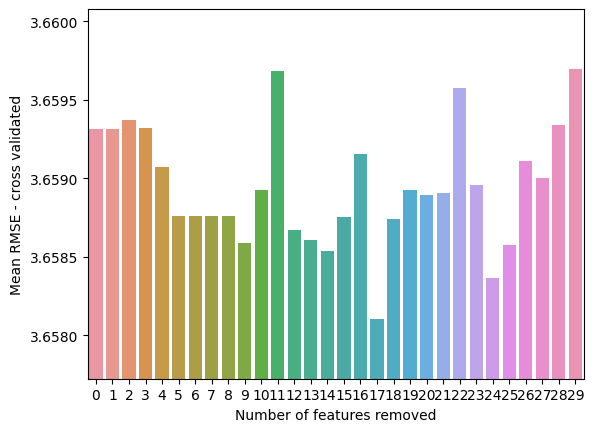

In [22]:

p = barplot(data = tmp, y = "Mean RMSE - cross validated", x = "Number of features removed")
p.set_ylim(tmp['Mean RMSE - cross validated'].min()-tmp['Mean RMSE - cross validated'].std(), tmp['Mean RMSE - cross validated'].max()+ tmp['Mean RMSE - cross validated'].std())
# p.set(ylabel = "Mean RMSE - cross validated", xlabel = "Number of features removed")

### features to drop 

In [7]:
features_to_drop = feature_importances["Feature Name"][-17:].tolist()
features_to_drop

['feature1_5',
 'new_merchant_category_id_bins_5_822_7_156_count',
 'new_city_id_bins_6_778_7_249_count',
 'count_state_id',
 'new_city_id_bins_1_608_6_778_count',
 'feature3_0',
 'new_state_id_bins_5_877_9_474_count',
 'new_merchant_category_id_bins_3_434_5_822_count',
 'count_city_id',
 'new_merchant_category_id_bins_0_001_3_434_count',
 'new_merchant_category_id_bins_0_001_3_434_fraction',
 'old_purchase_date_min_year',
 'new_purchase_date_max_year',
 'new_subsector_id_bins_2_0780000000000003_7_706_count',
 'new_purchase_date_min_year',
 'new_subsector_id_bins_2_0780000000000003_7_706_fraction',
 'feature3_1']

In [1]:
len(['feature1_5',
 'new_merchant_category_id_bins_5_822_7_156_count',
 'new_city_id_bins_6_778_7_249_count',
 'count_state_id',
 'new_city_id_bins_1_608_6_778_count',
 'feature3_0',
 'new_state_id_bins_5_877_9_474_count',
 'new_merchant_category_id_bins_3_434_5_822_count',
 'count_city_id',
 'new_merchant_category_id_bins_0_001_3_434_count',
 'new_merchant_category_id_bins_0_001_3_434_fraction',
 'old_purchase_date_min_year',
 'new_purchase_date_max_year',
 'new_subsector_id_bins_2_0780000000000003_7_706_count',
 'new_purchase_date_min_year',
 'new_subsector_id_bins_2_0780000000000003_7_706_fraction',
 'feature3_1'])


17

### check effectiveness to feature elimination
- perform 5 fold cv

In [10]:
subset_features = list(set(feature_importances["Feature Name"].tolist())-set(features_to_drop))
X, y = data[subset_features], data["target"]
train = lgb.Dataset(data = X, label = y)
cv = lgb.cv(
    params = best_params, 
    train_set = train, 
    num_boost_round = 1000, 
    nfold=5, 
    metrics = ["rmse"],
    stratified = False, 
    categorical_feature = "auto",
    verbose_eval = 10,
    early_stopping_rounds = 10,
    return_cvbooster = False
)
score = min(cv["rmse-mean"])
print(score)

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Total Bins 80725
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 424
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82358 + 0.0703391
[20]	cv_agg's rmse: 3.80078 + 0.0703793
[30]	cv_agg's rmse: 3.78132 + 0.0703846
[40]	cv_agg's rmse: 3.76467 + 0.0700627
[50]	cv_agg's rmse: 3.75019 + 0.0701135
[60]	cv_agg's rmse: 3.73846 + 0.0703139
[70]	cv_agg's rmse: 3.72835 + 0.0703836
[80]	cv_agg's rmse: 3.71985 + 0.070151
[90]	cv_agg's rmse: 3.71244 + 0.070005
[100]	cv_agg's rmse: 3.70603 + 0.0698574
[110]	cv_agg's rmse: 3.70024 + 0.0700078
[120]	cv_agg's rmse: 3.69555 + 0.069969
[130]	cv_agg's rmse: 3.69147 + 0.0698496
[140]	cv_agg's rmse: 3.68777 + 0.0696681
[150]	cv_agg's rmse: 3.68455 + 0.0696151
[160]	cv_agg's rmse: 3.68178 + 0.0696468
[170]	cv_agg's rmse: 3.67946 + 0.0695946
[180]	cv_agg's rmse: 3.67718 + 0.0695956
[190]	cv_agg's rmse: 3.67539 + 0.0695557
[200]	cv_agg's rm

In [11]:
subset_features = feature_importances["Feature Name"].tolist()
X, y = data[subset_features], data["target"]
train = lgb.Dataset(data = X, label = y)
cv = lgb.cv(
    params = best_params, 
    train_set = train, 
    num_boost_round = 1000, 
    nfold=5, 
    metrics = ["rmse"],
    stratified = False, 
    categorical_feature = "auto",
    verbose_eval = 10,
    early_stopping_rounds = 10,
    return_cvbooster = False
)
score = min(cv["rmse-mean"])
print(score)

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Total Bins 81429
[LightGBM] [Info] Number of data points in the train set: 161532, number of used features: 438
[LightGBM] [Info] Start training from score -0.387307


C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score -0.394715
[LightGBM] [Info] Start training from score -0.396989
[LightGBM] [Info] Start training from score -0.400525
[LightGBM] [Info] Start training from score -0.388645
[10]	cv_agg's rmse: 3.82255 + 0.070164
[20]	cv_agg's rmse: 3.79994 + 0.070288
[30]	cv_agg's rmse: 3.78075 + 0.0700187
[40]	cv_agg's rmse: 3.76428 + 0.0697281
[50]	cv_agg's rmse: 3.75024 + 0.0696638
[60]	cv_agg's rmse: 3.73863 + 0.0697181
[70]	cv_agg's rmse: 3.72841 + 0.069884
[80]	cv_agg's rmse: 3.72008 + 0.0698152
[90]	cv_agg's rmse: 3.71271 + 0.0697166
[100]	cv_agg's rmse: 3.70621 + 0.069602
[110]	cv_agg's rmse: 3.70039 + 0.0697897
[120]	cv_agg's rmse: 3.69569 + 0.0695674
[130]	cv_agg's rmse: 3.69143 + 0.0694324
[140]	cv_agg's rmse: 3.68795 + 0.0693524
[150]	cv_agg's rmse: 3.68489 + 0.0693902
[160]	cv_agg's rmse: 3.6823 + 0.0694168
[170]	cv_agg's rmse: 3.6799 + 0.0691723
[180]	cv_agg's rmse: 3.67771 + 0.0691296
[190]	cv_agg's rmse: 3.67581 + 0.0691372
[200]	cv_agg's rmse: